In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration and Cleaning: Basic EDA

In [2]:
file = pd.read_csv("train.csv")

In [3]:
file

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
file.shape

(7613, 5)

### Checking for null values and handling missing data

In [5]:
file.duplicated().sum() # Checking for duplicate values in the dataset

0

In [6]:
file.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
file['keyword'].unique().shape

(222,)

In [8]:
file['location'].unique().shape

(3342,)

In [9]:
file['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [10]:
file['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [11]:
file['id'].nunique()

7613

As all the ids are unique, so We don't need the ids of the tweets for our model, thus we will drop this coloumn.</br>
Location also does not have any relation with the fake or real tweets, so we will be dropping these as well.</br>
As we saw that keyword are of some importance but when data was viewed the text coloumn already has those keywords so we can drop the keyword coloumn as well.

In [12]:
df = file.drop(columns=['id','keyword','location'])

In [13]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [14]:
df.isna().sum()

text      0
target    0
dtype: int64

We are now counting number of zeros and ones in the target coloumn

In [15]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [16]:
df.duplicated().sum()

92

After dropping the coloumns we can see again we are getting few duplicated rows and this occurs because maybe there were same tweets that were posted from different locations but had same texts and same target. So we will be dropping these duplicates.

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated(subset='text').sum()

18

Even after dropping the duplicates we are getting few duplicate rows when checked only for the text coloumn because there are rows in which text are same but target is different. Since they will be contributing to both the targets so they are completely unneccesary so we will drop both the occurences.

In [19]:
# Remove all occurrences of duplicate rows
df = df[~df.duplicated(subset='text',keep=False)]

In [20]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,on the flip side I'm at Walmart and there is a...,1
7606,Suicide bomber kills 15 in Saudi security site...,1
7608,Two giant cranes holding a bridge collapse int...,1


In [21]:
# grouped_df['target'].value_counts()\
#     .reset_index()\
#     .pivot(index='keyword', columns='target', values='count')\
#     .fillna(0)\
#     .rename(columns={0:'target_0', 1:'target_1'})

Now we will be checking whether our dataset is balanced or not in terms of our target column.  

In [22]:
df['target'].value_counts()

target
0    4297
1    3188
Name: count, dtype: int64

In the plot below, we can see that 0s(fake tweets) and 1s(real tweets) are somewhat balanced so its okay and so we don't need any preprocessing the data.

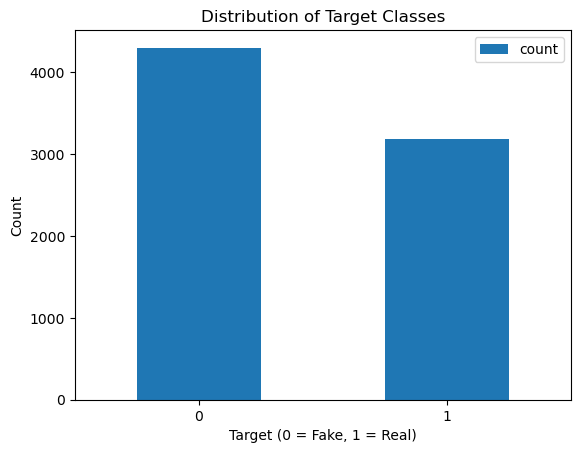

In [23]:
target_counts = pd.DataFrame(df['target'].value_counts())
target_counts.plot(kind='bar')
plt.title("Distribution of Target Classes")
plt.xlabel("Target (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# Text Preprocessing

In [24]:
import re
from wordcloud import WordCloud

In [25]:
df2 = df.copy()
df2

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,on the flip side I'm at Walmart and there is a...,1
7606,Suicide bomber kills 15 in Saudi security site...,1
7608,Two giant cranes holding a bridge collapse int...,1


### Removing punctuation, special characters, and numbers from tweets using regex.

We will remove tweets link, usernames and any character and numbers from the text. This data is obtained from web scrapping so in HTML '&' is changed to '&amp' so we will be removing those.</br>
At the end we will convert the text to lowercase and then remove any extra spaces present between the words.

In [26]:
def clean_text(sentence):
    sentence = re.sub(r'http[s]?://\S+', '', sentence).strip()
    sentence = re.sub(r'@\w+', '', sentence).strip()
    sentence = re.sub(r'&amp;', '', sentence)
    sentence = re.sub(r'[^a-zA-Z\s]+', '', sentence).strip()
    sentence = sentence.lower()
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [27]:
df2['processed_text'] = df2['text'].apply(lambda text: clean_text(text))

In [28]:
df2

,text,target,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines on glink tram upda...
7605,on the flip side I'm at Walmart and there is a...,1,on the flip side im at walmart and there is a ...
7606,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills in saudi security site mo...
7608,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...


In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
text_str = " ".join(df2['processed_text'].to_list())
text_str

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa or days ive lost count flood i

On visualizing this wordcloud we found that 'amp' was occuring frequently so we removed those when processing with regex.</br>
Now we can see that 'new', 'u', 'im' are occuring unnecesarily too much so we will add these in our stop words list so they can be removed.

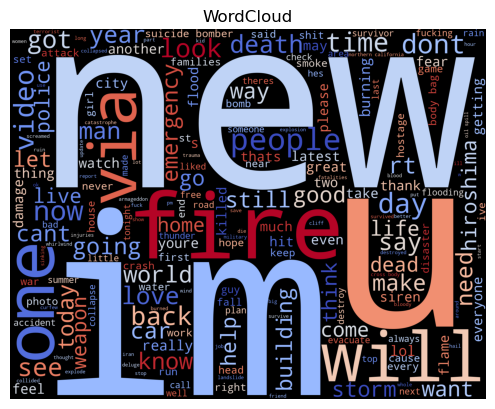

In [31]:
wordcloud = WordCloud(
    height=1400,
    width=1800,
    colormap='coolwarm'

).generate(text_str)

plt.figure(3)
plt.imshow(wordcloud)
plt.title("WordCloud")
plt.axis("off")
plt.show()

In [32]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"'", '', stop_word) for stop_word in stop_words}
stop_words.add('u')
stop_words.add('im')
stop_words.add('us')
stop_words.add('new')

### Code for Stop words removal

In [33]:
def remove_stopwords(text):
    words = re.findall(r'\b\w+\b',text)
    clean_words = [word for word in words if word not in stop_words]
    clean_text = " ".join(clean_words)
    return clean_text

In [34]:
df2['processed_text'] = df2['processed_text'].apply(lambda text: remove_stopwords(text))

In [35]:
df2

,text,target,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines glink tram update ...
7605,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
7606,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills saudi security site mosqu...
7608,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...


In [36]:
df2.isna().sum()

text              0
target            0
processed_text    0
dtype: int64

In [37]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

## Tokenization and Lemmatization

In [39]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_text = " ".join(lemmatized_words)
    # print(f"Lemmatized: {lemmatized_text}")
    return lemmatized_text

In [40]:
df2['final_text'] = df2['processed_text'].apply(lemmatization)

In [41]:
df2

,text,target,processed_text,final_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive,deed reason earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines glink tram update ...,worldnews fallen powerlines glink tram update ...
7605,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...
7606,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills saudi security site mosqu...,suicide bomber kill saudi security site mosque...
7608,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...,two giant crane holding bridge collapse nearby...


In [42]:
df2.duplicated(subset='final_text').sum()

717

After all the text preprocessing we are getting some duplicates so we will remove them.

In [43]:
df2 = df2.drop_duplicates(subset='final_text',keep='first')

In [44]:
df2

,text,target,processed_text,final_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive,deed reason earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...
7601,#breaking #LA Refugio oil spill may have been ...,1,breaking la refugio oil spill may costlier big...,breaking la refugio oil spill may costlier big...
7602,a siren just went off and it wasn't the Forney...,1,siren went forney tornado warning,siren went forney tornado warning
7603,Officials say a quarantine is in place at an A...,1,officials say quarantine place alabama home po...,official say quarantine place alabama home pos...
7605,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...


In [45]:
def wordcloud_plot(text):
    wordcloud = WordCloud(
                    height=1400,
                    width=1800,
                    colormap='coolwarm'
                ).generate(text)

    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In wordcloud we can see now every word seems to be important so we will not remove any mode words from the our 'final text' column

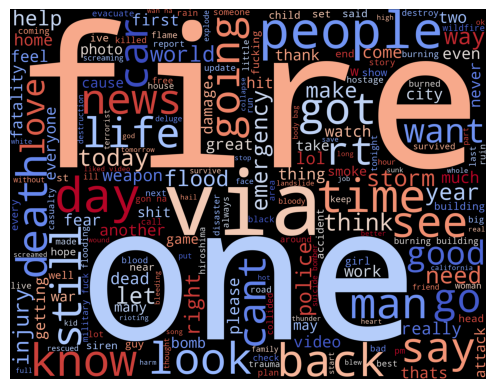

In [46]:
final_txt = df2['final_text'].to_list()
final_str = " ".join(final_txt)
wordcloud_plot(final_str)

# Feature Extraction

In [47]:
X = df2['final_text']
Y = df2['target']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

### Transforming the preprocessed text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency)


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [51]:
X_train_tf_idf = vectorizer.fit_transform(X_train)
X_test_tf_idf = vectorizer.transform(X_test)

# Model Building

#### 1. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
LR_model = LogisticRegression()
LR_model.fit(X_train_tf_idf, Y_train)

LogisticRegression()

In [54]:
Y_pred_LR = LR_model.predict(X_test_tf_idf)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

#### Performance Metrics

In [56]:
def model_performance(Y_test,Y_pred):
    acc_score = accuracy_score(Y_test,Y_pred)
    class_report = classification_report(Y_test,Y_pred)
    conf_matrix = confusion_matrix(Y_test,Y_pred)
    print(f'Accuracy:   {acc_score}')
    print(f'Classification Report:\n{class_report}')
    print(f'Confusion Matrix:\n{conf_matrix}')

In [57]:
model_performance(Y_test,Y_pred_LR)

Accuracy:   0.8020679468242246
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       395
           1       0.84      0.65      0.73       282

    accuracy                           0.80       677
   macro avg       0.81      0.78      0.79       677
weighted avg       0.81      0.80      0.80       677

Confusion Matrix:
[[361  34]
 [100 182]]


##### Hyperparameter Tuning using RandomizedSearchCV from sklearn

In [79]:
# Parameter grid for Logistic Regression
param_dist_LR = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],      # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers supporting L1 and L2
    'max_iter': [100, 200, 500, 1000]  # Maximum iterations
}

In [80]:
# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=LR_model,
    param_distributions=param_dist_LR,
    n_iter=300,  # Number of parameter combinations to try
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [81]:
# Fit the RandomizedSearchCV on training data
random_search.fit(X_train_tf_idf, Y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 200, 'C': 1.623776739188721}
Best Cross-Validation Accuracy: 0.7847651645875174


Performance Metrics for Hyperparamter tuned Logistic Regression Model

In [82]:
# Train Logistic Regression with the best parameters
best_LR_model = random_search.best_estimator_

# Predict on the test set
Y_best_LR = best_LR_model.predict(X_test_tf_idf)

# Evaluate model performance
model_performance(Y_test,Y_best_LR)

Accuracy:   0.8020679468242246
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       395
           1       0.83      0.66      0.74       282

    accuracy                           0.80       677
   macro avg       0.81      0.78      0.79       677
weighted avg       0.81      0.80      0.80       677

Confusion Matrix:
[[357  38]
 [ 96 186]]


#### 2. Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVC

In [84]:
SVM_model = SVC(probability=True)
SVM_model.fit(X_train_tf_idf, Y_train)

SVC(probability=True)

In [85]:
Y_pred_SVM = SVM_model.predict(X_test_tf_idf)

In [86]:
# YprdLR = SVM_model.predict(X_train_tf_idf)

In [88]:
model_performance(Y_test,Y_pred_SVM)

Accuracy:   0.8020679468242246
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       395
           1       0.85      0.64      0.73       282

    accuracy                           0.80       677
   macro avg       0.81      0.78      0.79       677
weighted avg       0.81      0.80      0.80       677

Confusion Matrix:
[[363  32]
 [102 180]]


##### Hyperparameter Tuning using RandomizedSearchCV from sklearn

In [89]:
# Parameter grid for SVM
param_dist_SVM = {
    'C': np.logspace(-3, 3, 10),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly')
}

In [90]:
# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=SVM_model,
    param_distributions=param_dist_SVM,
    n_iter=500,  # Number of parameter combinations to try
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [91]:
# Fit RandomizedSearchCV on training data
random_search.fit(X_train_tf_idf, Y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 2.154434690031882}
Best Cross-Validation Accuracy: 0.7872267370357948


Performance Metrics for Hyperparamter tuned SVM Model

In [93]:
# Train SVM with the best parameters
best_SVM_model = random_search.best_estimator_

# Predict on the test set
Y_best_SVM = best_SVM_model.predict(X_test_tf_idf)
# Ytrain_best_SVM = best_SVM_model.predict(X_train_tf_idf)

# Evaluate model performance
model_performance(Y_test,Y_best_SVM)

Accuracy:   0.7858197932053176
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       395
           1       0.80      0.65      0.72       282

    accuracy                           0.79       677
   macro avg       0.79      0.77      0.77       677
weighted avg       0.79      0.79      0.78       677

Confusion Matrix:
[[348  47]
 [ 98 184]]


#### 3. Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
# Initialize and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tf_idf, Y_train)

# Predict on the test set
Y_pred_NB = nb_model.predict(X_test_tf_idf)

In [96]:
# YprdLR = nb_model.predict(X_train_tf_idf)

In [97]:
model_performance(Y_test,Y_pred_NB)

Accuracy:   0.7976366322008862
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       395
           1       0.85      0.63      0.72       282

    accuracy                           0.80       677
   macro avg       0.81      0.77      0.78       677
weighted avg       0.81      0.80      0.79       677

Confusion Matrix:
[[363  32]
 [105 177]]


##### Hyperparameter Tuning using RandomizedSearchCV from sklearn

In [98]:
param_dist_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

In [99]:
random_search = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_dist_nb,
    n_iter=12,  # Number of parameter combinations to try
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [100]:
random_search.fit(X_train_tf_idf, Y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'fit_prior': True, 'alpha': 1.0}
Best Cross-Validation Accuracy: 0.7849276170540067


Performance Metrics for Hyperparamter tuned MultinomialNB Model

In [101]:
# Train MultinomialNB with the best parameters
best_nb_model = random_search.best_estimator_

# Predict on the test set
Y_best_nb = best_nb_model.predict(X_test_tf_idf)

# Evaluate model performance
model_performance(Y_test,Y_best_nb)

Accuracy:   0.7976366322008862
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       395
           1       0.85      0.63      0.72       282

    accuracy                           0.80       677
   macro avg       0.81      0.77      0.78       677
weighted avg       0.81      0.80      0.79       677

Confusion Matrix:
[[363  32]
 [105 177]]


### Visualization and Analysis of ROC curves and Precision-Recall curves for all models.

In [102]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [103]:
def plot_model_curves(models, X_test, Y_test):
    """
    Plot ROC and Precision-Recall curves for all models.

    Args:
    - models: List of (model_name, model_object) tuples.
    - X_test: Test features.
    - y_test: True labels for the test set.
    """
    plt.figure(figsize=(15, 7))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models:
        # Get predicted probabilities
        Y_proba = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(Y_test, Y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title("ROC Curve", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right")

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models:
        # Get predicted probabilities
        Y_proba = model.predict_proba(X_test)[:, 1]

        # Compute Precision-Recall curve and Average Precision
        precision, recall, _ = precision_recall_curve(Y_test, Y_proba)
        avg_precision = average_precision_score(Y_test, Y_proba)

        plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

    plt.title("Precision-Recall Curve", fontsize=14)
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

In [104]:
models = [
    ("Logistic Regression", best_LR_model),  # Logistic Regression
    ("SVM", best_SVM_model),                     # Support Vector Machine
    ("Naive Bayes", best_nb_model)               # Multinomial Naive Bayes
]


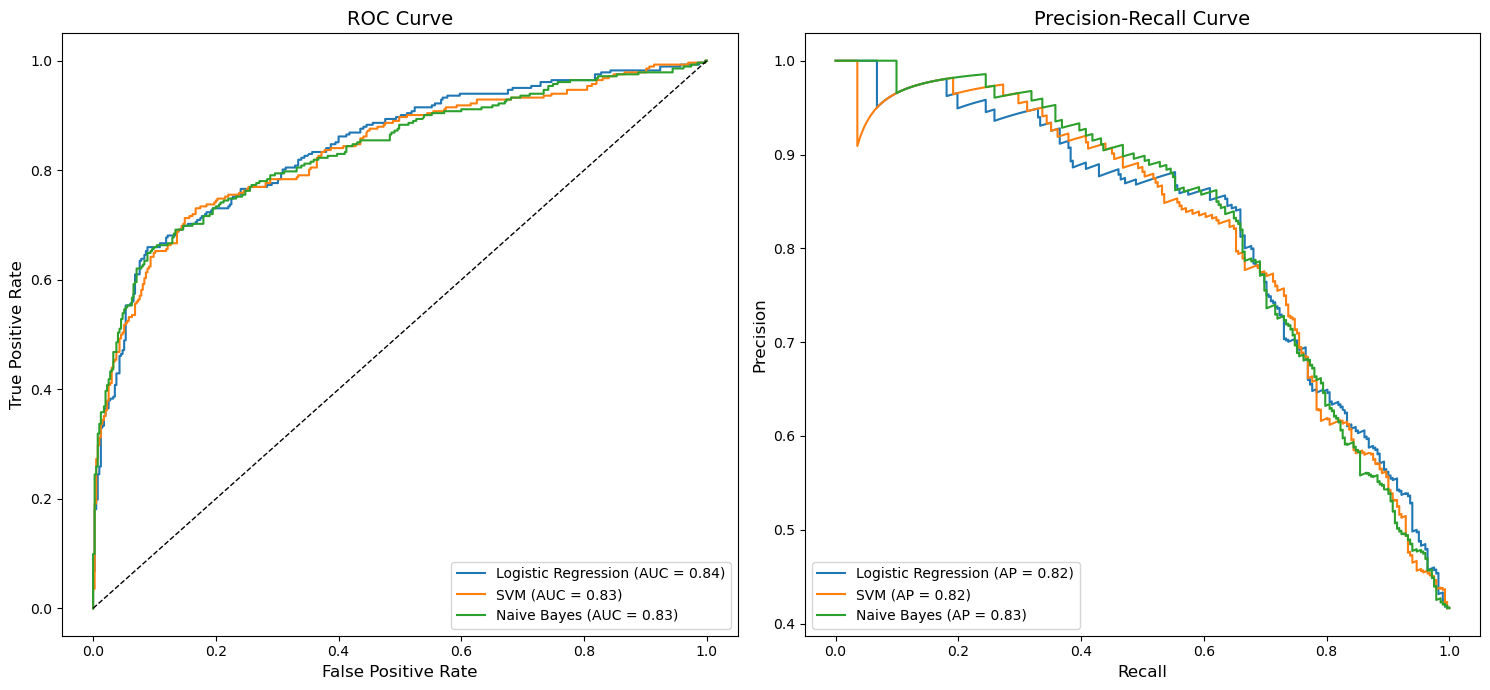

In [106]:
plot_model_curves(models,X_test_tf_idf,Y_test)

#### Misclassified Examples

In [107]:
misclassified = pd.DataFrame({
    'Text': X_test,                      # Original text
    'True Label': Y_test,                # Actual text labels
    'Predicted Label': Y_best_LR            # Predicted text labels
})

# Filter misclassified examples
misclassified = misclassified[misclassified['True Label'] != misclassified['Predicted Label']]

In [110]:
misclassified.head(10)

,Text,True Label,Predicted Label
244,maybe call israel tell sorry pres sold river a...,0,1
140,awwww theyre airplane accident theyre gon na d...,1,0
6143,intending go waiting wind drop siren gone sign...,1,0
51,man wife get six year jail setting ablaze niece,1,0
627,prepare hhs selects regional special pathogen ...,0,1
5038,oso washington mudslide response interview part,1,0
552,indeed fully aware battle support fight,1,0
3094,still beard visited prison keep hideous beard ...,1,0
6172,dad said look thinner usual really like,1,0
6321,scary stuff san antonio star head coach dan hu...,1,0


In [118]:
misclassified['Predicted Label'].value_counts()

Predicted Label
0    96
1    38
Name: count, dtype: int64

### Visualizing confusion matrices

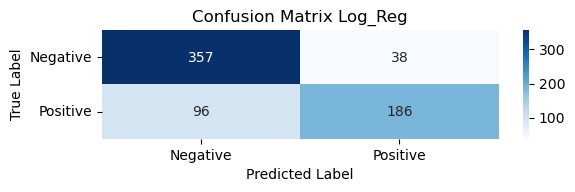

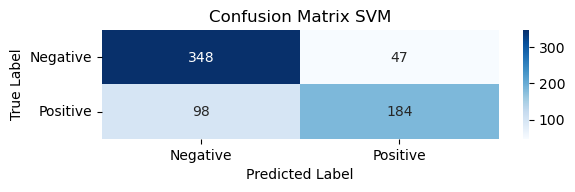

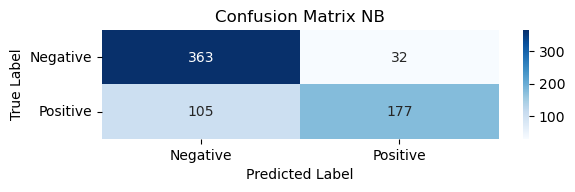

In [122]:
cm_LR = confusion_matrix(Y_test, Y_best_LR)
cm_SVM = confusion_matrix(Y_test, Y_best_SVM)
cm_nb = confusion_matrix(Y_test, Y_best_nb)


# Plot confusion matrix
plt.figure()
plt.subplot(3,1,1)
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Log_Reg")
plt.show()

plt.subplot(3,1,2)
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix SVM")
plt.show()

plt.subplot(3,1,3)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix NB")
plt.show()

# Predictions on Testing Dataset

In [123]:
test = pd.read_csv('test.csv')

In [124]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [131]:
test_file = test.drop(columns=['id','keyword','location'])

In [132]:
test_file

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [134]:
test_file['processed_text'] = test_file['text'].apply(clean_text)

In [135]:
test_file['processed_text'] = test_file['processed_text'].apply(remove_stopwords)

In [136]:
test_file

,text,processed_text
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...
3259,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityothers harde...
3260,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo


In [137]:
test_file['final_text'] = test_file['processed_text'].apply(lemmatization)

In [138]:
test_file

,text,processed_text,final_text
0,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...,heard earthquake different city stay safe ever...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...,forest fire spot pond goose fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,apocalypse lighting spokane wildfire
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan,typhoon soudelor kill china taiwan
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...,earthquake safety los angeles safety fastener ...
3259,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityothers harde...,storm ri worse last hurricane cityothers harde...
3260,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,green line derailment chicago
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo,meg issue hazardous weather outlook hwo


In [168]:
x = test_file['final_text']

In [169]:
x_test_tfidf = vectorizer.transform(x)

#### Since we were getting highest accuracy in our Hyperparameter tuned Logistic Regression Model, so we would be using this model to give predictions on our Testing Dataset

In [170]:
y_predict = best_LR_model.predict(x_test_tfidf)

In [171]:
final_file = pd.DataFrame({
    'id': test['id'],  # 'id' column from test dataset
    'target': y_predict  # Predicted labels
})

In [172]:
final_file = final_file.set_index('id')

In [173]:
final_file

,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [174]:
final_file['target'].value_counts()

target
0    2122
1    1141
Name: count, dtype: int64

In [175]:
final_file.to_csv('submission.csv')